#**Train-Test Split**

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* ***Train Dataset:*** Used to fit the machine learning model.
* ***Test Dataset:*** Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.

##***When to Use the Train-Test Split***

The idea of “sufficiently large” is specific to each predictive modeling problem. It means that there is enough data to split the dataset into train and test datasets and each of the train and test datasets are suitable representations of the problem domain. This requires that the original dataset is also a suitable representation of the problem domain.

A suitable representation of the problem domain means that there are enough records to cover all common cases and most uncommon cases in the domain. This might mean combinations of input variables observed in practice. It might require thousands, hundreds of thousands, or millions of examples.

Conversely, the train-test procedure is not appropriate when the dataset available is small. The reason is that when the dataset is split into train and test sets, there will not be enough data in the training dataset for the model to learn an effective mapping of inputs to outputs. There will also not be enough data in the test set to effectively evaluate the model performance. The estimated performance could be overly optimistic (good) or overly pessimistic (bad).

If you have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.

In addition to dataset size, another reason to use the train-test split evaluation procedure is computational efficiency.

Some models are very costly to train, and in that case, repeated evaluation used in other procedures is intractable. An example might be deep neural network models. In this case, the train-test procedure is commonly used.

Alternately, a project may have an efficient model and a vast dataset, although may require an estimate of model performance quickly. Again, the train-test split procedure is approached in this situation.

Samples from the original training dataset are split into the two subsets using random selection. This is to ensure that the train and test datasets are representative of the original dataset.

##***How to Configure the Train-Test Split***

The procedure has one main configuration parameter, which is the size of the train and test sets. This is most commonly expressed as a percentage between 0 and 1 for either the train or test datasets. For example, a training set with the size of 0.67 (67 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

There is no optimal split percentage.

***You must choose a split percentage that meets your project’s objectives with considerations that include:***

* Computational cost in training the model.
* Computational cost in evaluating the model.
* Training set representativeness.
* Test set representativeness.


***The function takes 2 loaded dataset as input and returns 4 dataset split into two subsets.***

###***The Importance of Data Splitting***

Supervised machine learning is about creating models that precisely map the given inputs (independent variables, or predictors) to the given outputs (dependent variables, or responses).

How you measure the precision of your model depends on the type of a problem you’re trying to solve. In regression analysis, you typically use the coefficient of determination, root-mean-square error, mean absolute error, or similar quantities. For classification problems, you often apply accuracy, precision, recall, F1 score, and related indicators.

The acceptable numeric values that measure precision vary from field to field. 
What’s most important to understand is that you usually need unbiased evaluation to properly use these measures, assess the predictive performance of your model, and validate the model.

This means that you can’t evaluate the predictive performance of a model with the same data you used for training. You need evaluate the model with fresh data that hasn’t been seen by the model before. You can accomplish that by splitting your dataset before you use it.

###***Training, Validation, and Test Sets***

Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into three subsets:

* The training set is applied to train, or fit, your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.

* The validation set is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal number of neurons in a neural network or the best kernel for a support vector machine, you experiment with different values. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

* The test set is needed for an unbiased evaluation of the final model. You shouldn’t use it for fitting or validation.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.

###***Underfitting and Overfitting***

Splitting a dataset might also be important for detecting if your model suffers from one of two very common problems, called underfitting and overfitting:

1. ***Underfitting*** is usually the consequence of a model being unable to encapsulate the relations among data. For example, this can happen when trying to represent nonlinear relations with a linear model. Underfitted models will likely have poor performance with both training and test sets.

2. ***Overfitting*** usually takes place when a model has an excessively complex structure and learns both the existing relations among data and noise. Such models often have bad generalization capabilities. Although they work well with training data, they usually yield poor performance with unseen (test) data.

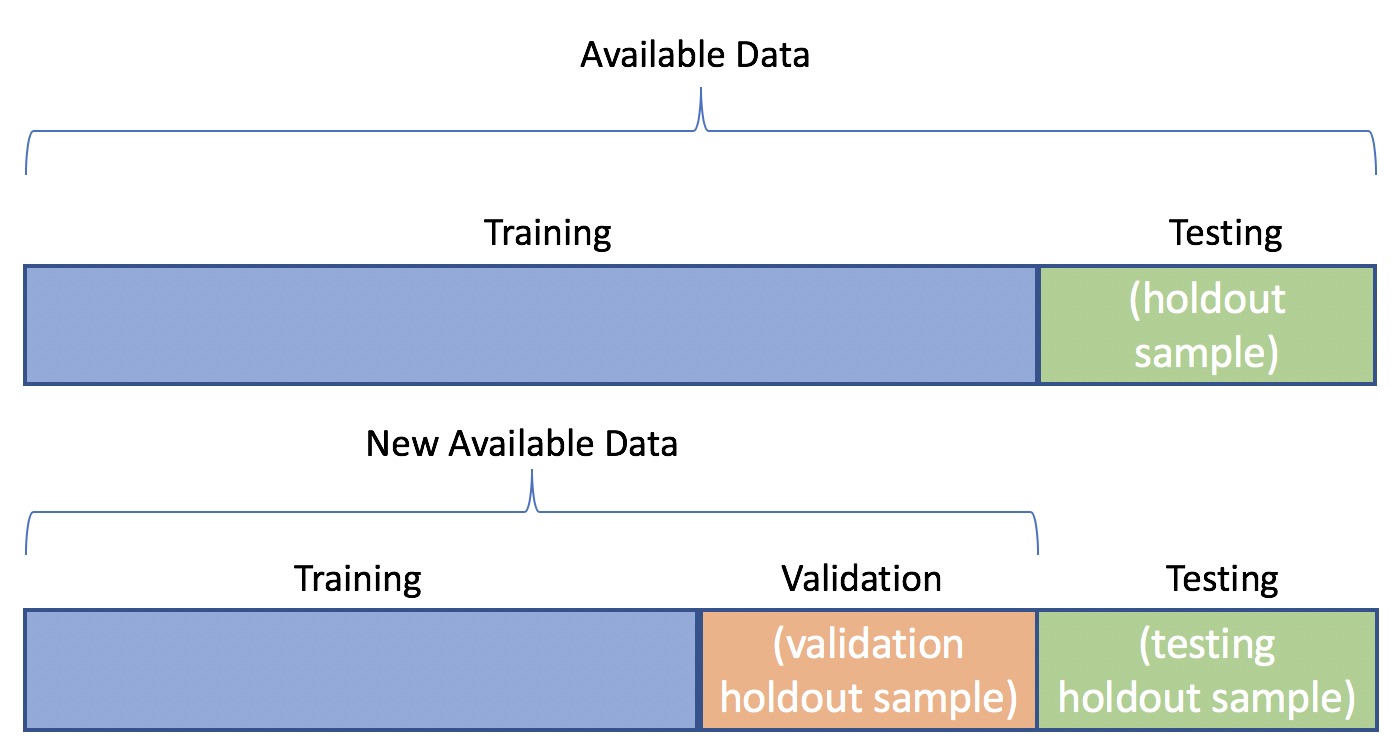

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train
y_train
X_test
y_test


#**Stratified K-Fold CV**

The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on
the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

K-fold cross-validation means splitting the training set into K-folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds.

***Why random sampling is not preferred in machine learning ?***

Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

1. **Random sampling**

If we do random sampling to split the dataset into training_set and test_set in 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

2. **Stratified Sampling**

In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

In [ ]:
# STRATIFIED K-FOLD CROSS VALIDATION { 10-fold }

# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
cancer = datasets.load_breast_cancer()
# Input_x_Features.
x = cancer.data						

# Input_ y_Target_Variable.
y = cancer.target					


# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create classifier object.
lr = linear_model.LogisticRegression()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]
	lr.fit(x_train_fold, y_train_fold)
	lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.9298245614035088, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.9821428571428571]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 92.98245614035088 %

Overall Accuracy: 96.66353383458647 %

Standard Deviation is: 0.02097789213195869


#**Pipeline**

Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.
Many data scientists hack together models without pipelines, but pipelines have some important benefits. 
Those include:
* Cleaner Code: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.
* Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.
* Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
* More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

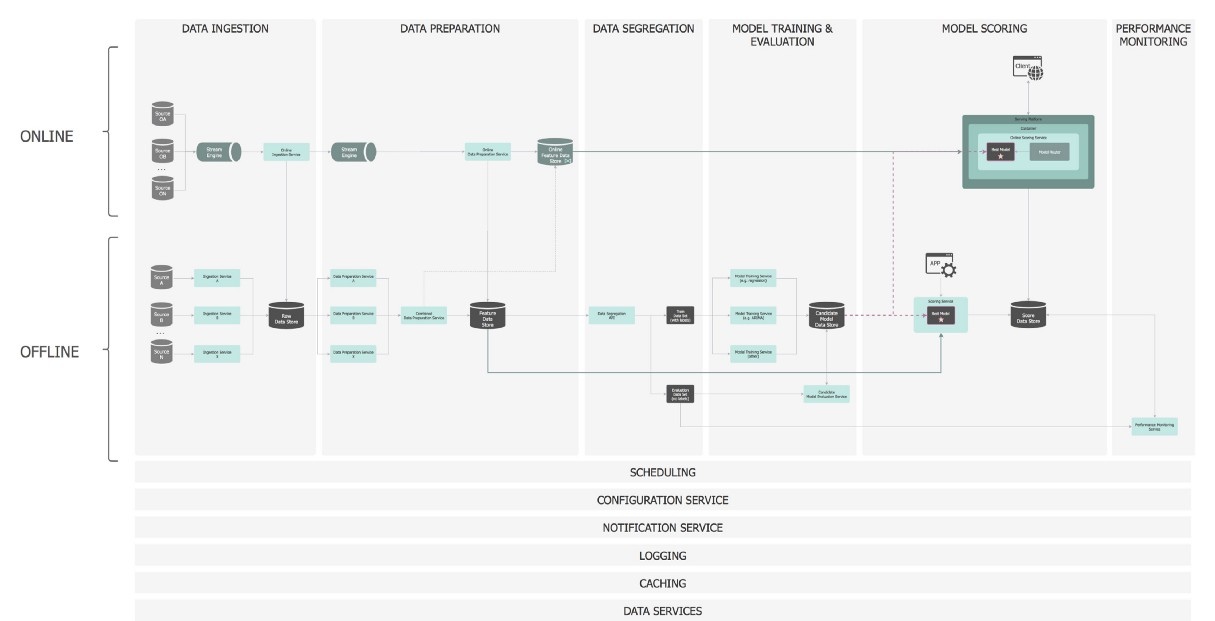

###***1-Data Ingestion***
Funnelling incoming data into a data store is the first step of any ML workflow. The key point is that data is persisted without undertaking any transformation at all, to allow us to have an immutable record of the original dataset. Data can be fed from various data sources; either obtained by request (pub/sub) or streamed from other services.
NoSQL document databases are ideal for storing large volumes of rapidly changing structured and/or unstructured data, since they are schema-less. They also offer a distributed, scalable, replicated data storage.

###***2-Data Preparation***
Data exploration, data transformation and feature engineering. As this is the most complex part of a ML project, introducing the right design patterns is crucial, so in terms of code organisation having a factory method to generate the features based on some common abstract feature behaviour as well as a strategy pattern to allow the selection of the right features at run time is a sensible approach. Both feature extractors and transformers should structured with composition and re-usability in mind.

###***3-Data Segregation***
Split subsets of data to train the model and further validate how it performs against new data. The fundamental goal of the ML system is to use an accurate model based on the quality of its pattern prediction for data that it has not been trained on. As such, existing labelled data is used as a proxy for future/unseen data, by splitting it into training and evaluation subsets.

###***4-Model Training***
Use the training subset of data to let the ML algorithm recognise the patterns in it. The model training pipeline is offline only and its schedule varies depending on the criticality of the application, from every couple of hours to once a day. Apart from schedulers, the service is also time and event triggered.

###***5-Candidate Model Evaluation***
Assess the performance of the model using the test subset of data to understand how accurate the prediction is. This pipeline is also offline. The predictive performance of a model is evaluated by comparing predictions on the evaluation dataset with true values using a variety of metrics. The “best” model on the evaluation subset is selected to make predictions on future/new instances. A library of several evaluators is designed to provide a model’s accuracy metrics (e.g. ROC curve, PR curve), which are also saved against the model in the data store. Again, same patterns are applicable here to allow flexibility on combining and switching between evaluators.

###***6-Model Deployment***
Once the chosen model is produced, it is typically deployed and embedded in decision-making frameworks. Model deployment is not the end; it is just the beginning!
The best model selected is deployed for offline (asynchronous) and online (synchronous) predictions. More than one models can be deployed at any time to enable safe transition between old and new models — i.e. when
deploying a new model, the services need to keep serving prediction requests.

###***7-Model Scoring***
Process of applying a ML model to a new dataset in order to uncover practical insights that will help solve a business problem. A.k.a. Model Serving. Model Scoring and Model Serving are two terms that are used interchangeably in the industry. What scoring really means, occurred to me after reading this resource, so before moving on, let’s quickly cover the basics, in case this is not clear to you either:
Model Scoring is the process of generating new values, given a model and some new input. 

###***8-Performance Monitoring***
The model is continuously monitored to observe how it behaved in the real world and calibrated accordingly.Any ML solution requires a well-defined performance monitoring solution.



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.88

#**Saving & Loading Models**

1. **Pickle**

Pickle is the standard way of serializing objects in Python.
You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
Later you can load this file to deserialize your model and use it to make new predictions.

2. **Joblib**

Joblib is part of the SciPy ecosystem and provides utilities for pipelining Python jobs.
It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently.
This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (like K-Nearest Neighbors).

In [ ]:
# PICKLE

import numpy as np 
from sklearn.model_selection import train_test_split
# Load dataset 
from sklearn.datasets import load_iris 
iris = load_iris() 

X = iris.data 
y = iris.target 

# Split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# import KNeighborsClassifier model 
from sklearn.neighbors import KNeighborsClassifier as KNN 
knn = KNN(n_neighbors = 3) 

# train model 
knn.fit(X_train, y_train) 

import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 

# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test) 


array([1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0,
       0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1,
       2])

In [ ]:
# JOBLIB

import numpy as np 
from sklearn.model_selection import train_test_split
import joblib
# Load dataset 
from sklearn.datasets import load_iris 
iris = load_iris() 

X = iris.data 
y = iris.target 

# Split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# import KNeighborsClassifier model 
from sklearn.neighbors import KNeighborsClassifier as KNN 
model = KNN(n_neighbors = 3) 

# train model 
model.fit(X_train, y_train) 

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9555555555555556


#**GridSearchCV**

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

**Why should I use it?**

If you work with ML, you know what a nightmare it is to stipulate values for hyper parameters. There are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate this process and make life a little bit easier for ML enthusiasts.

First, we need to import GridSearchCV from the sklearn library, a machine learning library for python. The estimator parameter of GridSearchCV requires the model we are using for the hyper parameter tuning process. For this example, we are using the rbf kernel of the Support Vector Regression model(SVR). The param_grid parameter requires a list of parameters and the range of values for each parameter of the specified estimator. The most significant parameters required when working with the rbf kernel of the SVR model are c, gamma and epsilon. A list of values to choose from should be given to each hyper parameter of the model. You can change these values and experiment more to see which value ranges give better performance. A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.

#**Randomized Search**

The grid search approach is fine when you are exploring relatively few combinations, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

In [ ]:
# GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
# RandomSearchCV
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}